In [3]:
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as plt
from config import v_key

In [13]:
d_state_covid = pd.read_csv("Data/NJ state time series.csv" )
d_state_covid.head()


,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuHeadroomRatio,metrics.icuHeadroomDetails,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered
0,2020-01-22,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2020-01-23,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2020-01-24,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,2020-01-25,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,2020-01-26,US,NJ,Atlantic County,34001,NaN,NaN,iso1:us#iso2:us-nj#fips:34001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [29]:
#getting columns needed for vaccination 
d_state_covid_conv_df=d_state_covid[['date','county','fips','actuals.cases','actuals.deaths','actuals.newCases',
         'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
         'actuals.vaccinesAdministered','actuals.newDeaths']]
clean_vaccine_df =d_state_covid_conv_df.dropna(subset=['actuals.cases','actuals.deaths','actuals.newCases',
                                                    'actuals.vaccinationsInitiated','actuals.vaccinationsCompleted',
                                                    'actuals.vaccinesAdministered','actuals.newDeaths'])
clean_vaccine_df.head()




,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths
393,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0
394,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0
395,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0
396,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0
397,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0


In [30]:
population_url ="https://api.covidactnow.org/v2/county/NJ.json?apiKey=" + v_key
population_response = requests.get(population_url).json()
#getting population data
fips=[]
population = []

for county_row in population_response:
    fips.append(int(county_row['fips']))
    population.append(county_row['population'])
    
population_dict = {
     "fips": fips,
     "Total Population": population}
    
population_data_total  = pd.DataFrame(population_dict)
population_data_total.head()

,fips,Total Population
0,34001,263670
1,34003,932202
2,34005,445349
3,34007,506471
4,34009,92039


In [32]:
# merging vaccination data with population
vaccines_mer_pd = clean_vaccine_df.merge(population_data_total, how ="left", on ="fips")
vaccines_mer_pd.head()

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population
0,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670
1,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670
2,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670
3,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670
4,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670


In [ ]:
vaccines_mer_pd

### Percentage , other calculations


percentage, in days ??

In [57]:
percent_counties_vaccine = pd.DataFrame(vaccines_mer_pd[["date","fips","county"]])

percent_counties_vaccine.head()


,date,fips,county
0,2021-02-18,34001,Atlantic County
1,2021-02-19,34001,Atlantic County
2,2021-02-20,34001,Atlantic County
3,2021-02-21,34001,Atlantic County
4,2021-02-22,34001,Atlantic County


In [60]:
percent_counties_vaccine["Percent completed"]= vaccines_mer_pd["actuals.vaccinationsCompleted"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine["Percent initiated"]= vaccines_mer_pd["actuals.vaccinationsInitiated"]/vaccines_mer_pd["Total Population"]*100
percent_counties_vaccine

,date,fips,county,Percent completed,Percent initiated
0,2021-02-18,34001,Atlantic County,5.349111,13.318542
1,2021-02-19,34001,Atlantic County,5.579702,13.396291
2,2021-02-20,34001,Atlantic County,5.690446,13.422081
3,2021-02-21,34001,Atlantic County,6.026472,13.722077
4,2021-02-22,34001,Atlantic County,6.286646,13.794137
...,...,...,...,...,...
2887,2021-07-08,34041,Warren County,44.491626,48.749371
2888,2021-07-09,34041,Warren County,44.544824,48.797819
2889,2021-07-10,34041,Warren County,44.618921,48.869066
2890,2021-07-11,34041,Warren County,44.705368,48.927014


In [91]:
Data_date = "2021-07-10"
percent_vaccine = percent_counties_vaccine.loc[percent_counties_vaccine["date"]==Data_date].sort_values(by=['Percent completed'], ascending =False)
percent_vaccine.head()


,date,fips,county,Percent completed,Percent initiated
1914,2021-07-10,34027,Morris County,63.167461,69.143938
2469,2021-07-10,34035,Somerset County,62.791320,69.931050
276,2021-07-10,34003,Bergen County,60.750460,66.520132
1639,2021-07-10,34023,Middlesex County,57.412534,64.493577
681,2021-07-10,34009,Cape May County,57.205098,61.804235


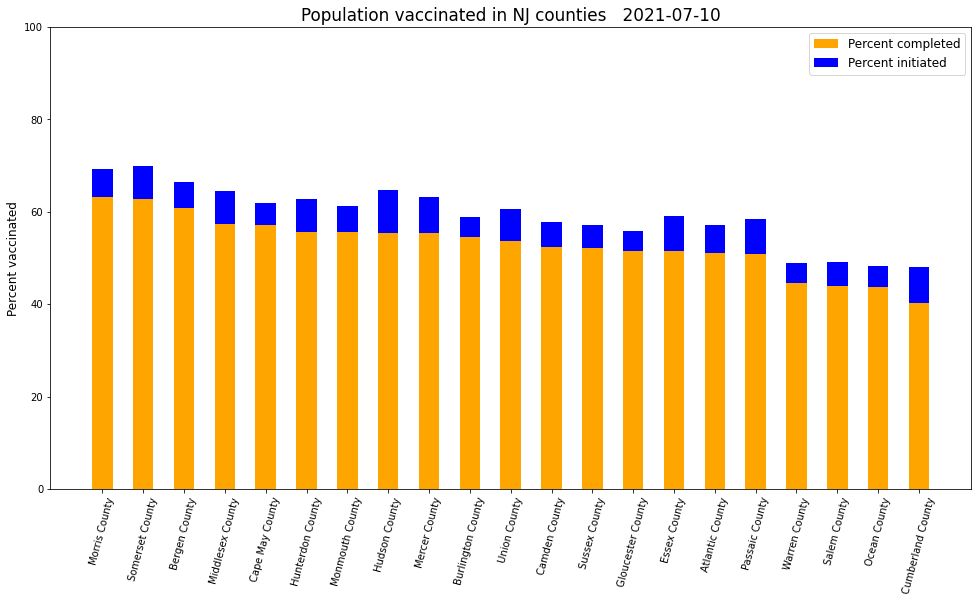

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
header = ['Percent completed','Percent initiated']
dataset = [percent_vaccine["Percent completed"],percent_vaccine["Percent initiated"]]
X_AXIS = percent_vaccine["county"]

matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 14})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16.5, 8.5)

configs = dataset[0]
N = len(configs)
ind = np.arange(N)
width = 0.5


p1 = plt.bar(ind, dataset[0], width, color='orange')
p2 = plt.bar(ind, np.array(dataset[1])-np.array(dataset[0]), width, bottom=dataset[0], color='b')

plt.ylim([0,100])
plt.yticks(fontsize=10)
plt.ylabel("Percent vaccinated", fontsize=12)
plt.xticks(ind, X_AXIS, fontsize=10, rotation=75)
plt.title("Population vaccinated in NJ counties   "  + Data_date)
plt.legend((p1[0], p2[0]), (header[0], header[1]), fontsize=12)
plt.show()



In [169]:
time_vaccine_df = pd.DataFrame(vaccines_mer_pd)
time_vaccine_df.head()
time_vaccine_df =time_vaccine_df.sort_values(['county', 'date'])
time_vaccine_df["delta_init"]=time_vaccine_df['actuals.vaccinationsInitiated'].diff()
index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"]).fillna(0) 
index_county_df.loc[index_county_df['delta_init'] <0]=0

#time_vaccine_df["delta_init"]=time_vaccine_df.groupby(['county', 'date'])['actuals.vaccinationsInitiated']#.transform(pd.Series.diff)

index_county_df.head(10)

,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Atlantic County,2021-02-18,Atlantic County,34001,23833.0,546.0,153.0,35117.0,14104.0,49228.0,10.0,263670,0.0
Atlantic County,2021-02-19,Atlantic County,34001,23909.0,549.0,76.0,35322.0,14712.0,50038.0,3.0,263670,205.0
Atlantic County,2021-02-20,Atlantic County,34001,24048.0,551.0,139.0,35390.0,15004.0,50399.0,2.0,263670,68.0
Atlantic County,2021-02-21,Atlantic County,34001,24131.0,551.0,83.0,36181.0,15890.0,52166.0,0.0,263670,791.0
Atlantic County,2021-02-22,Atlantic County,34001,24207.0,552.0,76.0,36371.0,16576.0,52947.0,1.0,263670,190.0
Atlantic County,2021-02-23,Atlantic County,34001,24298.0,559.0,91.0,37625.0,17338.0,53840.0,7.0,263670,1254.0
Atlantic County,2021-02-24,Atlantic County,34001,24405.0,562.0,107.0,37854.0,17929.0,55796.0,3.0,263670,229.0
Atlantic County,2021-02-25,Atlantic County,34001,24515.0,563.0,110.0,39493.0,19246.0,58753.0,1.0,263670,1639.0
Atlantic County,2021-02-26,Atlantic County,34001,24606.0,566.0,91.0,39622.0,19393.0,59029.0,3.0,263670,129.0


In [162]:
#index_county_df = time_vaccine_df.set_index(time_vaccine_df["county"])
county_x= index_county_df.loc[index_county_df['county'] == "Morris County"]
county_x




,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Morris County,2021-02-19,Morris County,34027,36077.0,1103.0,179.0,77921.0,38427.0,116374.0,0.0,491845,898.0
Morris County,2021-02-20,Morris County,34027,36220.0,1109.0,143.0,78499.0,39229.0,117778.0,6.0,491845,578.0
Morris County,2021-02-21,Morris County,34027,36343.0,1110.0,123.0,79729.0,41080.0,122069.0,1.0,491845,1230.0
Morris County,2021-02-22,Morris County,34027,36515.0,1111.0,172.0,82667.0,42928.0,125596.0,1.0,491845,2938.0
Morris County,2021-02-23,Morris County,34027,36691.0,1113.0,176.0,85213.0,44157.0,126924.0,2.0,491845,2546.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Morris County,2021-07-08,Morris County,34027,50451.0,1241.0,12.0,339273.0,309634.0,633865.0,0.0,491845,459.0
Morris County,2021-07-09,Morris County,34027,50462.0,1241.0,11.0,339725.0,310246.0,634901.0,0.0,491845,452.0
Morris County,2021-07-10,Morris County,34027,50485.0,1241.0,23.0,340081.0,310686.0,635650.0,0.0,491845,356.0


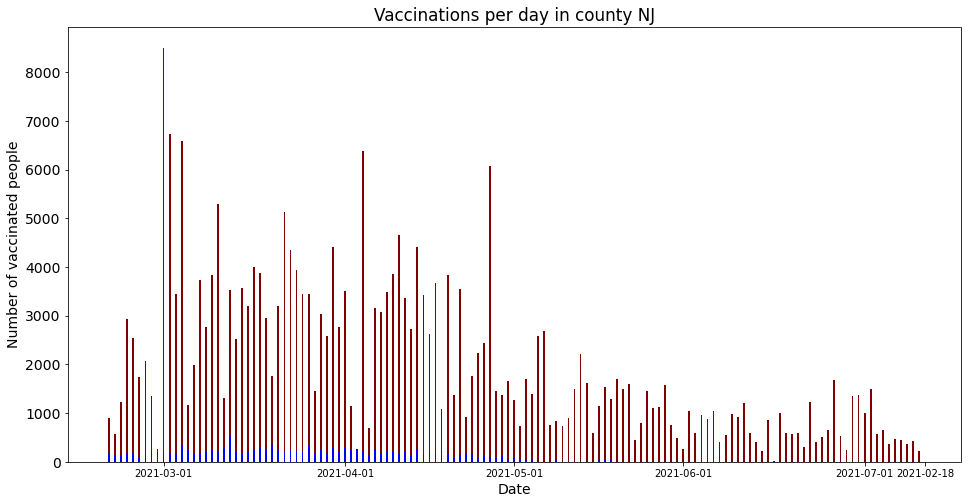

In [170]:
x_axis = county_x["date"]
values = county_x['delta_init']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
plt.bar(x_axis, values, color ='maroon', width = 0.3)
plt.bar(x_axis, county_x['actuals.newCases'], color ='blue', width = 0.3)
 
plt.xlabel("Date")
plt.ylabel("Number of vaccinated people")
plt.xticks(['2021-02-18','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=0)
#plt.legend
plt.title("Vaccinations per day in county NJ")
plt.show()

### Vaccinations vs new cases (absolute values)

In [196]:
#plot: setting x_values, y_values 
x_values = county_x["delta_init"]
y_values =  county_x["actuals.newCases"]


In [197]:
# Performed a linear regression on Humidity vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

county
Morris County     64.226640
Morris County     50.993572
Morris County     77.955949
Morris County    148.587453
Morris County    132.376944
                    ...    
Morris County     46.072524
Morris County     45.783051
Morris County     41.813130
Morris County     44.377037
Morris County     36.147723
Name: delta_init, Length: 135, dtype: float64


In [198]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.04x +27.09


The r-value is: 0.3879170934462184


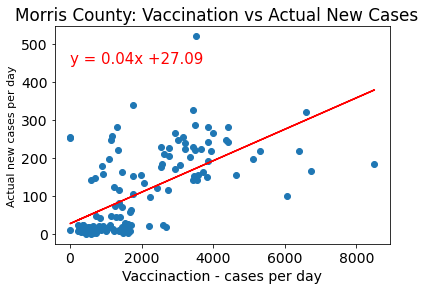

In [199]:
# Create Plot
x_values = county_x["delta_init"]
y_values =  county_x["actuals.newCases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Morris County: Vaccination vs Actual New Cases  ")
plt.ylabel("Actual new cases per day", fontsize = 11)
plt.xlabel("Vaccinaction - cases per day")

plt.annotate(line_eq,(0,450),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()

In [200]:
county_y=index_county_df.loc[index_county_df['county'] == "Cumberland County"]
county_y.head(60)


,date,county,fips,actuals.cases,actuals.deaths,actuals.newCases,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinesAdministered,actuals.newDeaths,Total Population,delta_init
county,,,,,,,,,,,,
Cumberland County,2021-02-19,Cumberland County,34011,13871.0,349.0,48.0,15561.0,6879.0,22441.0,3.0,149527,118.0
Cumberland County,2021-02-20,Cumberland County,34011,13938.0,349.0,67.0,15616.0,6987.0,22604.0,0.0,149527,55.0
Cumberland County,2021-02-21,Cumberland County,34011,13955.0,350.0,17.0,15712.0,7204.0,22938.0,1.0,149527,96.0
Cumberland County,2021-02-22,Cumberland County,34011,14011.0,350.0,56.0,15731.0,7296.0,23027.0,0.0,149527,19.0
Cumberland County,2021-02-23,Cumberland County,34011,14047.0,353.0,36.0,15781.0,7370.0,23083.0,3.0,149527,50.0
Cumberland County,2021-02-24,Cumberland County,34011,14102.0,356.0,55.0,16531.0,7913.0,24445.0,3.0,149527,750.0
Cumberland County,2021-02-25,Cumberland County,34011,14124.0,360.0,22.0,17209.0,8197.0,25409.0,4.0,149527,678.0
Cumberland County,2021-02-26,Cumberland County,34011,14199.0,367.0,75.0,17256.0,8285.0,25544.0,7.0,149527,47.0
Cumberland County,2021-02-27,Cumberland County,34011,14267.0,369.0,68.0,17256.0,8285.0,25544.0,2.0,149527,0.0


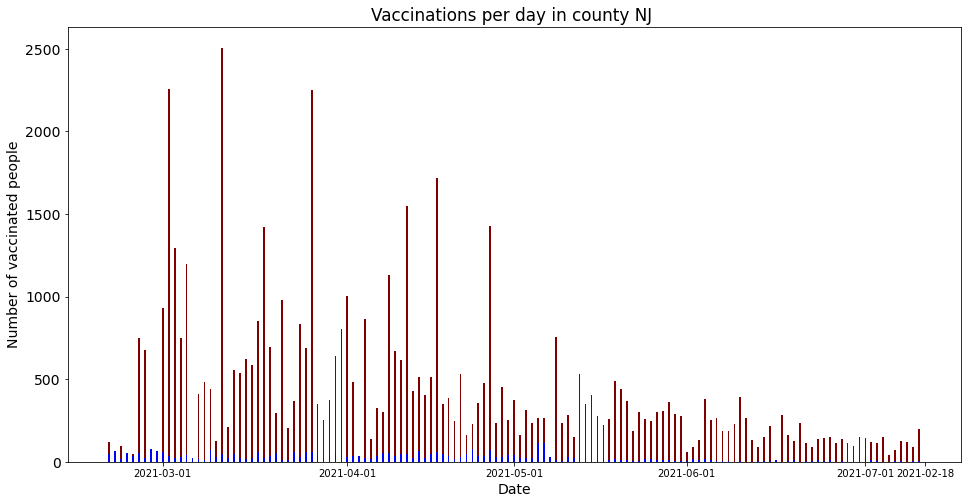

In [173]:
x_axis = county_y["date"]
values = county_y['delta_init']
  
fig = plt.figure(figsize = (16, 8))
fig.tight_layout()
# creating the bar plot
plt.bar(x_axis, values, color ='maroon', width = 0.3)
plt.bar(x_axis, county_y['actuals.newCases'], color ='blue', width = 0.3)
 
plt.xlabel("Date")
plt.ylabel("Number of vaccinated people")
plt.xticks(['2021-02-18','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01'], fontsize=10, rotation=0)
plt.title("Vaccinations per day in county NJ ")
plt.show()

In [201]:
#plot: setting x_values, y_values 
x_values = county_y["delta_init"]
y_values =  county_y["actuals.newCases"]


In [202]:
# Performed a linear regression on Humidity vs. latitude
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

county
Cumberland County    20.268583
Cumberland County    19.184123
Cumberland County    19.889883
Cumberland County    18.564432
Cumberland County    19.098055
                       ...    
Cumberland County    19.442328
Cumberland County    20.389078
Cumberland County    20.337437
Cumberland County    19.734960
Cumberland County    21.645674
Name: delta_init, Length: 137, dtype: float64


In [203]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.02x +18.24


The r-value is: 0.1070180416583671


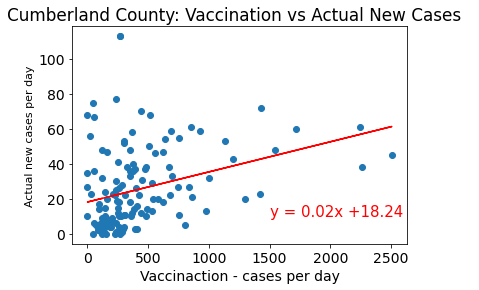

In [205]:
# Create Plot
x_values = county_y["delta_init"]
y_values =  county_y["actuals.newCases"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Cumberland County: Vaccination vs Actual New Cases  ")
plt.ylabel("Actual new cases per day", fontsize = 11)
plt.xlabel("Vaccinaction - cases per day")

plt.annotate(line_eq,(1500,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")


# Show plot
plt.show()